In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install  -U -q transformers trl datasets bitsandbytes peft accelerate
# Tested with transformers==4.46.3, trl==0.12.1, datasets==3.1.0, bitsandbytes==0.45.0, peft==0.13.2, accelerate==1.1.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.4/366.4 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install  -U -q trl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.4/366.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
system_message = """
You are a Vision-Language Model specialized in understanding real-world object images with annotated bounding boxes.
Your task is to analyze the visual content, including detected objects, their locations, and appearances, and respond accurately to natural language queries.

Possible queries include:
- Describing the objects in the image in detail
- Estimating market prices based on visual and contextual cues
- Answering specific factual or contextual questions about the image

Your responses should be concise, accurate, and directly based on the visual information. Use the image content, object positions, and any visual clues to inform your answers. Avoid unnecessary explanation unless explicitly requested.
"""


In [ ]:
from PIL import Image,ImageDraw
from datasets import Dataset
import pandas as pd
import ast
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/nlp_project_elte/df_merged.csv")

In [ ]:
training, testing = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
RESIZE_SIZE = (512, 512)

In [ ]:
def create_qa_entry(row, idx, split, query_type='description'):
    image = Image.open(row['image_path']).convert("RGB")

    # Resize + BBox Adjust
    original_size = image.size
    image = image.resize(RESIZE_SIZE)

    scale_x = RESIZE_SIZE[0] / original_size[0]
    scale_y = RESIZE_SIZE[1] / original_size[1]

    draw = ImageDraw.Draw(image)
    bboxes = ast.literal_eval(row['bboxes'])
    for box in bboxes:
        scaled_box = [
            int(box[0] * scale_x),
            int(box[1] * scale_y),
            int(box[2] * scale_x),
            int(box[3] * scale_y)
        ]
        draw.rectangle(scaled_box, outline="red", width=5)

    # Save or return PIL image (depends on HFImage() use)
    # If using Hugging Face datasets, we return raw PIL.Image.Image

    # Define the query/label based on type
    if query_type == 'description':
        query = "Describe the objects identified in the image in detail."
        label = [row['descriptions']]
    elif query_type == 'price_estimate':
        query = "Estimate the market price of the item(s) in the image."
        label = ["$999"]
    else:
        query = "What objects are in the image?"
        label = [row['descriptions']]  # fallback

    return {
        "image": image,
        "query": query,
        "label": label,
        "human_or_machine": 0
    }


In [ ]:
from datasets import Dataset

qa_entries = [create_qa_entry(row, idx, 'train') for idx, row in training.iterrows()]
qa_dataset = Dataset.from_list(qa_entries)

In [ ]:
qa_entries = [create_qa_entry(row, idx, 'test') for idx, row in testing.iterrows()]
qa_testing = Dataset.from_list(qa_entries)

In [ ]:
def format_data(sample):
    return [
        {
            "role": "system",
            "content": [{"type": "text", "text": system_message}],
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": sample["image"],
                },
                {
                    "type": "text",
                    "text": sample["query"],
                },
            ],
        },
        {
            "role": "assistant",
            "content": [{"type": "text", "text": sample["label"][0]}],
        },
    ]

In [ ]:
train_dataset = [format_data(sample) for sample in qa_dataset]


In [ ]:
test_dataset = [format_data(sample) for sample in qa_testing]


In [ ]:
train_dataset[200]

[{'role': 'system',
  'content': [{'type': 'text',
    'text': 'You are a Vision Language Model specialized in interpreting visual data from chart images.\nYour task is to analyze the provided chart image and respond to queries with concise answers, usually a single word, number, or short phrase.\nThe charts include a variety of types (e.g., line charts, bar charts) and contain colors, labels, and text.\nFocus on delivering accurate, succinct answers based on the visual information. Avoid additional explanation unless absolutely necessary.'}]},
 {'role': 'user',
  'content': [{'type': 'image',
    'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>},
   {'type': 'text',
    'text': 'Describe the objects identified in the image in detail.'}]},
 {'role': 'assistant',
  'content': [{'type': 'text',
    'text': "Vehicle Summary:\nThe vehicle is a 2022 Mercedes-Benz Actros 1851 heavy tractor truck inspected in Budapest. It is designed for freight transport domestically an

In [ ]:
import torch
from transformers import Idefics3ForConditionalGeneration, AutoProcessor

model_id = "HuggingFaceTB/SmolVLM-Instruct"

In [ ]:
model = Idefics3ForConditionalGeneration.from_pretrained(
    model_id,
    device_map="auto",
    torch_dtype=torch.bfloat16,
    _attn_implementation="eager",
)

processor = AutoProcessor.from_pretrained(model_id)

config.json:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/429 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

In [ ]:
train_dataset[1]

[{'role': 'system',
  'content': [{'type': 'text',
    'text': 'You are a Vision Language Model specialized in interpreting visual data from chart images.\nYour task is to analyze the provided chart image and respond to queries with concise answers, usually a single word, number, or short phrase.\nThe charts include a variety of types (e.g., line charts, bar charts) and contain colors, labels, and text.\nFocus on delivering accurate, succinct answers based on the visual information. Avoid additional explanation unless absolutely necessary.'}]},
 {'role': 'user',
  'content': [{'type': 'image',
    'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>},
   {'type': 'text',
    'text': 'Describe the objects identified in the image in detail.'}]},
 {'role': 'assistant',
  'content': [{'type': 'text',
    'text': '### Diesel Locomotive Description\n\n**Vehicle Summary:**\nThis is a CZ LOKO EffiShunter 1600 diesel locomotive, manufactured in 2018. The locomotive has a robus

In [ ]:
train_dataset[1][1:2]

[{'role': 'user',
  'content': [{'type': 'image',
    'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>},
   {'type': 'text',
    'text': 'Describe the objects identified in the image in detail.'}]}]

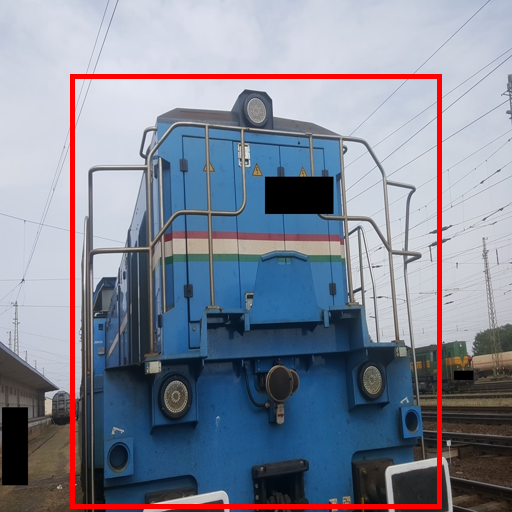

In [ ]:
train_dataset[1][1]["content"][0]["image"]

In [ ]:
def generate_text_from_sample(model, processor, sample, max_new_tokens=1024, device="cuda"):
    # Prepare the text input by applying the chat template
    text_input = processor.apply_chat_template(
        sample[1:2], add_generation_prompt=True  # Use the sample without the system message
    )

    image_inputs = []
    image = sample[1]["content"][0]["image"]
    if image.mode != "RGB":
        image = image.convert("RGB")
    image_inputs.append([image])

    # Prepare the inputs for the model
    model_inputs = processor(
        # text=[text_input],
        text=text_input,
        images=image_inputs,
        return_tensors="pt",
    ).to(
        device
    )  # Move inputs to the specified device

    # Generate text with the model
    generated_ids = model.generate(**model_inputs, max_new_tokens=max_new_tokens)

    # Trim the generated ids to remove the input ids
    trimmed_generated_ids = [out_ids[len(in_ids) :] for in_ids, out_ids in zip(model_inputs.input_ids, generated_ids)]

    # Decode the output text
    output_text = processor.batch_decode(
        trimmed_generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )

    return output_text[0]  # Return the first decoded output text

In [ ]:
output = generate_text_from_sample(model, processor, train_dataset[1])
output

" The image depicts a blue train with a prominent feature highlighted by a red box. The train is positioned in a slightly angled view, allowing a clear view of its front and rear. The train is primarily blue with a white stripe running horizontally across its middle section. The front of the train has a black bumper, which is a protective component. The train's front is equipped with a set of rail tracks, which are visible in the lower part of the image.\n\nThe train's rear section is highlighted by a red box, which is placed in the center of the image. Inside the red box, there is a black square, which is likely a part of the train's control panel or a safety feature. The train's rear also has a black bumper, similar to the one at the front. The train's wheels are visible, and the train's body is adorned with various markings and indicators, including a white stripe running horizontally across its middle section.\n\nThe background of the image shows a portion of the train yard, with o

In [ ]:
import gc
import time


def clear_memory():
    # Delete variables if they exist in the current global scope
    if "inputs" in globals():
        del globals()["inputs"]
    if "model" in globals():
        del globals()["model"]
    if "processor" in globals():
        del globals()["processor"]
    if "trainer" in globals():
        del globals()["trainer"]
    if "peft_model" in globals():
        del globals()["peft_model"]
    if "bnb_config" in globals():
        del globals()["bnb_config"]
    time.sleep(2)

    # Garbage collection and clearing CUDA memory
    gc.collect()
    time.sleep(2)
    torch.cuda.empty_cache()
    torch.cuda.synchronize()
    time.sleep(2)
    gc.collect()
    time.sleep(2)

    print(f"GPU allocated memory: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
    print(f"GPU reserved memory: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")


clear_memory()

GPU allocated memory: 0.01 GB
GPU reserved memory: 0.02 GB


In [ ]:
!pip install -U bitsandbytes

In [ ]:
from transformers import BitsAndBytesConfig

# BitsAndBytesConfig int-4 config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, bnb_4bit_use_double_quant=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.bfloat16
)

# Load model and tokenizer
model = Idefics3ForConditionalGeneration.from_pretrained(
    model_id,
    device_map="auto",
    torch_dtype=torch.bfloat16,
    # quantization_config=bnb_config,
    _attn_implementation="eager",
)
processor = AutoProcessor.from_pretrained(model_id)

In [ ]:
from peft import LoraConfig, get_peft_model

# Configure LoRA
peft_config = LoraConfig(
    r=8,
    lora_alpha=8,
    lora_dropout=0.1,
    target_modules=["down_proj", "o_proj", "k_proj", "q_proj", "gate_proj", "up_proj", "v_proj"],
    use_dora=True,
    init_lora_weights="gaussian",
)

# Apply PEFT model adaptation
peft_model = get_peft_model(model, peft_config)

# Print trainable parameters
peft_model.print_trainable_parameters()

trainable params: 11,269,248 || all params: 2,257,542,128 || trainable%: 0.4992


In [ ]:
from trl import SFTConfig

# Configure training arguments using SFTConfig
training_args = SFTConfig(
    output_dir="smolvlm-instruct-trl-sft-ChartQA",
    num_train_epochs=5,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    warmup_steps=50,
    learning_rate=1e-4,
    weight_decay=0.01,
    logging_steps=25,
    save_strategy="steps",
    save_steps=25,
    save_total_limit=1,
    optim="adamw_torch_fused",
    bf16=True,
    push_to_hub=True,
    report_to="tensorboard",
    remove_unused_columns=False,
    gradient_checkpointing=True,
    dataset_text_field="",
    dataset_kwargs={"skip_prepare_dataset": True},
)

In [ ]:
image_token_id = processor.tokenizer.additional_special_tokens_ids[
    processor.tokenizer.additional_special_tokens.index("<image>")
]


def collate_fn(examples):
    texts = [processor.apply_chat_template(example, tokenize=False) for example in examples]

    image_inputs = []
    for example in examples:
        image = example[1]["content"][0]["image"]
        if image.mode != "RGB":
            image = image.convert("RGB")
        image_inputs.append([image])

    batch = processor(text=texts, images=image_inputs, return_tensors="pt", padding=True)
    labels = batch["input_ids"].clone()
    labels[labels == processor.tokenizer.pad_token_id] = -100  # Mask padding tokens in labels
    labels[labels == image_token_id] = -100  # Mask image token IDs in labels

    batch["labels"] = labels

    return batch

In [ ]:
from trl import SFTTrainer

trainer = SFTTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=collate_fn,
    peft_config=peft_config,
    processing_class=processor.tokenizer,
)

No label_names provided for model class `PeftModel`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [ ]:
trainer.train()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
25,1.733300
50,1.198500
75,0.804200
100,0.733800


TrainOutput(global_step=110, training_loss=1.0778252905065364, metrics={'train_runtime': 3959.8527, 'train_samples_per_second': 0.433, 'train_steps_per_second': 0.028, 'total_flos': 4.716109340158032e+16, 'train_loss': 1.0778252905065364})

In [ ]:
trainer.save_model("/content/drive/MyDrive/nlp_project_elte/"+training_args.output_dir)

No files have been modified since last commit. Skipping to prevent empty commit.


In [ ]:
clear_memory()

GPU allocated memory: 0.02 GB
GPU reserved memory: 0.23 GB


In [ ]:
model = Idefics3ForConditionalGeneration.from_pretrained(
    model_id,
    device_map="auto",
    torch_dtype=torch.bfloat16,
    _attn_implementation="eager",
)

processor = AutoProcessor.from_pretrained(model_id)

In [ ]:
adapter_path = "sergiopaniego/smolvlm-instruct-trl-sft-ChartQA"
model.load_adapter(adapter_path)

adapter_config.json:   0%|          | 0.00/860 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

In [ ]:
output = generate_text_from_sample(model, processor, test_dataset[20])
output

' The image depicts a scene inside a warehouse or industrial storage area, likely used for sorting or processing materials. The primary focus is on a central area where several objects are arranged.\n\n### Detailed Description:\n1. **Central Object:**\n   - **Type:** A long, narrow, wooden conveyor belt with a textured surface.\n   - **Color:** The surface of the conveyor belt is dark, possibly made of wood or a similar material.\n   - **Position:** The conveyor belt runs horizontally across the image, from left to right.\n   - **Function:** The belt is likely used for transporting or sorting materials.\n\n2. **Left Side:**\n   - **Objects:**\n     - **Leftmost Object:** A small, rectangular, metal container with a lid.\n     - **Next Object:** A larger, rectangular, metal container with a lid, filled with a mix of materials.\n     - **Additional Objects:** Several smaller containers and boxes, some of which are filled with materials.\n     - **Background:** A mix of materials, includi